# **Class Imbalance**

Class Imbalance occurs when classes in a dataset are not represented equally.
One class(majority) dominates while another(minority) has fewer samples.

Class imbalance is a common issue in machine learning, particularly in classification tasks. 
It can lead to biased models that perform poorly on the minority class. 

Techniques such as resampling, using different evaluation metrics, and employing specialized algorithms can help address this issue.

Our goal is to create a balanced training dataset (eg., aiming for a 50:50 ratio) for better model performance.

Common metrics for evaluating the performance of a model are accuracy, precision, recall, F1 score, confusion matrix.
Accuracy score never helps in evaluating the performance of a model when the dataset is imbalanced.
Precison and recall are the most important metrics for evaluating the performance of a model when the dataset is imbalanced.

**Problems with imbalanced datasets:**
1. Class imbalance can lead to biased models that favor the majority class.
2. It can result in poor generalization to the minority class.
3. Evaluation metrics like accuracy can be misleading in imbalanced scenarios.
4. It can cause overfitting to the majority class.
5. It can lead to under-representation of the minority class in the model's predictions.
6. It can complicate the training process, requiring more sophisticated techniques to handle the imbalance.
7. It can result in longer training times due to the need for specialized handling of imbalanced data.
8. It can lead to a lack of diversity in the model's learned features.


Ways to fix class imbalance in a dataset:
- Oversampling the minority class - this involves duplicating examples from the minority class to balance the dataset. Oversampling can however lead to overfitting, especially if the synthetic samples are too similar to the original ones. It is important to balance the dataset without introducing too much noise.
- Undersampling the majority class - this involves removing examples from the majority class to balance the dataset. Undersampling can however lead to loss of important information, especially if the dataset is small or if the minority class is significantly underrepresented. It is often used in conjunction with other techniques such as oversampling the minority class or using algorithms that are robust to class imbalance.
- Using synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples of the minority class.
- Using class weights in the loss function to give more importance to the minority class during training.   
- Using ensemble methods like Random Forest or Gradient Boosting that can handle class imbalance better than single classifiers.
- Using anomaly detection techniques to treat the minority class as anomalies and train a model to detect them.
- Using cost-sensitive learning where the model is penalized more for misclassifying the minority class.
- Using stratified sampling to ensure that each class is represented proportionally in training and validation sets.
- Using data augmentation techniques to artificially increase the size of the minority class by applying transformations like rotation, scaling, or flipping to existing examples.
- Using transfer learning to leverage pre-trained models that may have learned features relevant to the minority class.
- Using focal loss instead of standard cross-entropy loss to focus more on hard-to-classify examples, which are often from the minority class.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Total number of transactions
print("Total transactions (samples):", df.shape[0])

# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())

# Get fraud percentage
fraud_rate = (df['Class'].value_counts()[1] / df.shape[0]) * 100
print(f"\nFraud rate: {fraud_rate:.3f}%")


Total transactions (samples): 284807

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud rate: 0.173%


In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\anany\AppData\Local\Temp\ipykernel_17356\529207907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="Set3")


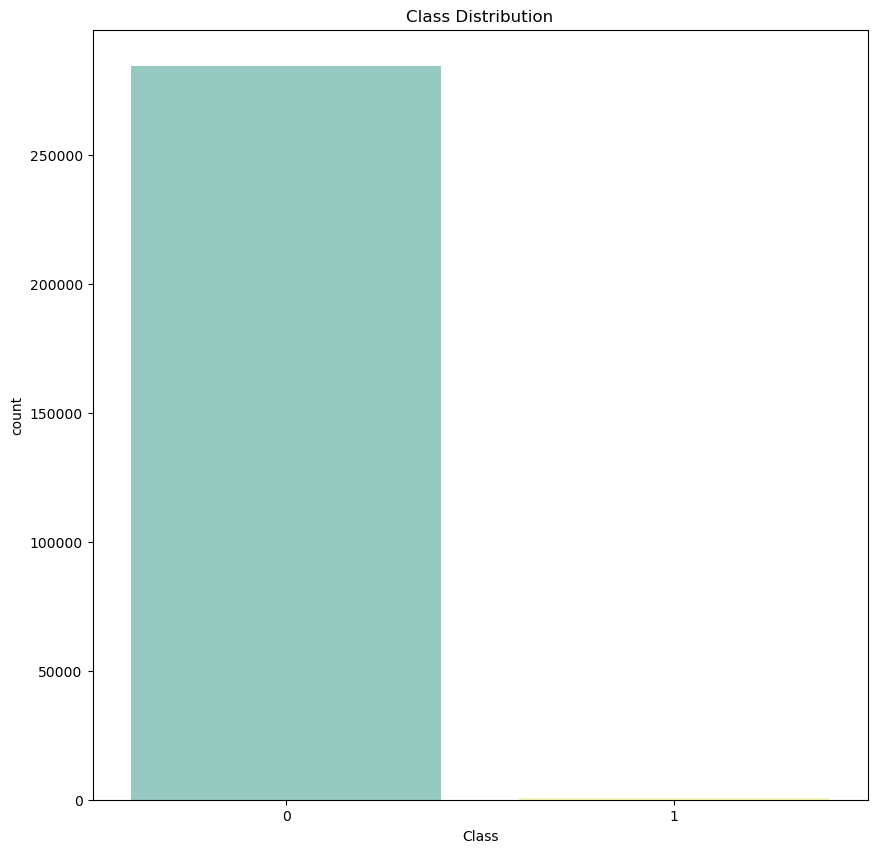

In [22]:
plt.figure(figsize=(10, 10))
sns.countplot(x="Class", data=df, palette="Set3")
plt.title("Class Distribution")
plt.show()

In [23]:
X = df.drop('Class', axis=1)
y = df["Class"]

In [24]:
# stratify ensures that the class distribution is preserved in both training and test sets
# stratify=y ensures that the split maintains the same proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.78      0.86       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     6]
 [   32   116]]


In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Model Score:", model.score(X_test, y_test))

Accuracy Score: 0.9995552590615966
Model Score: 0.9995552590615966
